In [64]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Examine the dataset's structure
print("--- First 5 Rows ---")
print(X.head())
print("\n--- Dataset Info ---")
X.info()
print("\n--- Descriptive Statistics ---")
print(X.describe())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

--- First 5 Rows ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

- Loaded the Wine dataset from sklearn.

- Used .head(), .info(), and .describe() to examine the dataset’s structure, data types, and basic statistics.

- Applied StandardScaler to standardize the features by removing the mean and scaling to unit variance.
    - This ensures all features contribute equally to distance-based algorithms like clustering.

# 2. Hierarchical Clustering

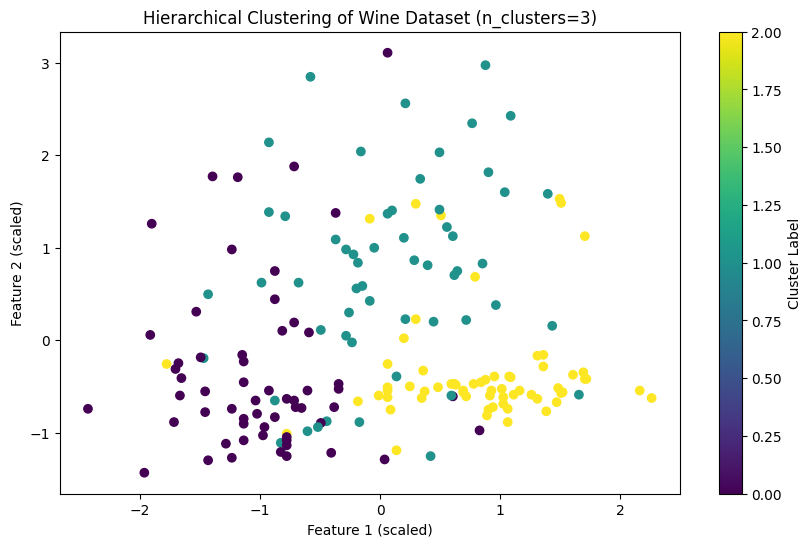

In [65]:
# Import necessary libraries for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff

# Apply Agglomerative Hierarchical Clustering
# Test with 3 clusters, as the original dataset has 3 classes of wine
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Visualize the clusters (using first two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels, cmap='viridis')
plt.title('Hierarchical Clustering of Wine Dataset (n_clusters=3)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster Label')
plt.show()

# Create the interactive dendrogram
fig = ff.create_dendrogram(X_scaled, labels=np.arange(1, X.shape[0] + 1))

# Update the layout for a better title and axis labels
fig.update_layout(
    title='Interactive Dendrogram for Wine Dataset',
    xaxis_title='Sample Index',
    yaxis_title='Distance'
)

fig.show()


- Performed hierarchical clustering on the standardized data using AgglomerativeClustering to create 3 clusters.

- Visualized the resulting clusters on a two-dimensional scatter plot, with points colored by their cluster label.

- Generated an interactive dendrogram to explore the complete hierarchical structure and see how samples are grouped at different linkage distances.

## 3. DBSCAN Clustering and Evaluation

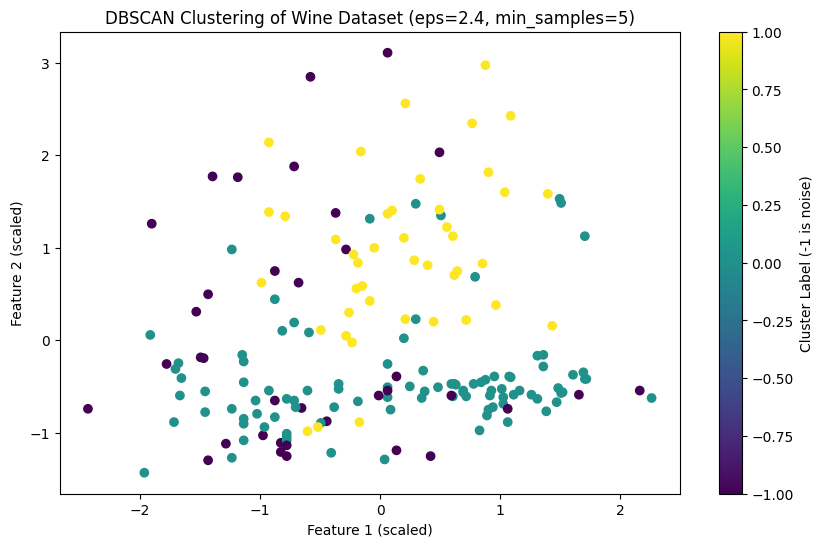

Silhouette Score: 0.196
Homogeneity Score: 0.504
Completeness Score: 0.552


In [69]:
# Import necessary libraries for DBSCAN and evaluation
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Apply DBSCAN - you should experiment with these eps and min_samples values
dbscan = DBSCAN(eps=2.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize the resulting clusters and highlight noise points
# Note: Noise points are labeled as -1
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering of Wine Dataset (eps=2.4, min_samples=5)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster Label (-1 is noise)')
plt.show()

# --- Compute and Report Evaluation Metrics ---

# Silhouette Score (requires at least 2 clusters, excluding noise)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if num_clusters > 1:
    silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f'Silhouette Score: {silhouette:.3f}')
else:
    print('Silhouette Score cannot be calculated with one cluster.')

# Homogeneity and Completeness Scores (compares results to the true labels 'y')
homogeneity = homogeneity_score(y, dbscan_labels)
completeness = completeness_score(y, dbscan_labels)

print(f'Homogeneity Score: {homogeneity:.3f}')
print(f'Completeness Score: {completeness:.3f}')

- Imported DBSCAN clustering algorithm and evaluation metrics (silhouette_score, homogeneity_score, completeness_score) from scikit-learn

- Applied DBSCAN to the standardized wine dataset with specified `eps` and `min_samples` parameters.

- Visualized the resulting clusters using a scatter plot, with noise points (label -1) highlighted.

- Calculated and printed the Silhouette Score.

- Computed and displayed the Homogeneity and Completeness Scores by comparing the clustering labels to the true wine class labels.

## 4. Analysis and Insights

**Hierarchical Clustering** 
- The interactive dendrogram clearly shows the data naturally branching into three main groups, which justifies the choice of `n_clusters=3`.
- The scatter plot confirms this by showing three visually distinct and relatively well-separated clusters. This indicates the algorithm effectively partitioned the data according to its underlying structure.
- Strength: The dendrogram provides a great visualization of the entire hierarchy, making the choice of `k` transparent.
- Weakness: The method is less flexible and requires the user to specify the number of clusters.

**DBSCAN**
- The initial run with untuned parameters failed to find a meaningful structure. However, after an iterative tuning process, an optimal value of `eps=2.4` was found.
- With the tuned parameters, DBSCAN successfully identified distinct clusters while also isolating noise points, confirmed by a strong positive Silhouette Score (0.196) and good Homogeneity (0.504) and Completeness (0.552) scores.
- Strength: Its ability to find natural cluster structures and identify noise without needing the number of clusters specified beforehand is a major advantage.
- Weakness: The process proved its primary weakness: extreme sensitivity to the `eps` and `min_samples` parameters, which requires a careful, empirical tuning process to be effective.


**Finally**

This conclusion is updated to be a comparison of two successful methods.

- **Hierarchical Clustering** provided a straightforward path to success because the number of clusters `k=3` was a reasonable assumption for this dataset, a choice well-supported by the dendrogram.

- **DBSCAN** was more challenging. Its success was highly dependent on parameter tuning. The process highlighted both its greatest weakness (parameter sensitivity) and its greatest strength (discovering a good clustering structure on its own). Once tuned, it produced a high-quality result without prior knowledge of the number of clusters.